In [235]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from skimage import transform
import scipy
from matplotlib.colors import Normalize
from matplotlib import pyplot as plt, animation


In [21]:
ct_folder_path = r"HCC_006\08-06-1999-NA-ABDPEL LIVER-65146\103.000000-LIVER 3 PHASE AP-45033/*.dcm"
# ct_folder_path = "HCC_006/08-06-1999-NA-ABDPEL LIVER-65146/4.000000-Recon 2 LIVER 3 PHASE AP-20374/*.dcm"
seg_file_path = r"HCC_006/08-06-1999-NA-ABDPEL LIVER-65146/300.000000-Segmentation-58134/1-1.dcm"

## PR 1

In [3]:
def load_dcm(filepath: str):
    """ Load a DICOM file. """
    return pydicom.dcmread(filepath)

## PR 2

In [138]:
def apply_cmap(img: np.ndarray, cmap_name: str = 'bone') -> np.ndarray:
    """ Apply a colormap to a 2D image. """
    cmap_function = matplotlib.colormaps[cmap_name]
    return cmap_function(img)

## PR 3

In [231]:
def median_sagittal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the median sagittal plane of the CT image provided. """
    return img_dcm[:, :, img_dcm.shape[1]//2]    # Why //2?


def median_coronal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the median sagittal plane of the CT image provided. """
    return img_dcm[:, img_dcm.shape[2]//2, :]


def MIP_sagittal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the maximum intensity projection on the sagittal orientation. """
    return np.max(img_dcm, axis=2)


def AIP_sagittal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the average intensity projection on the sagittal orientation. """
    return np.mean(img_dcm, axis=2)


def MIP_coronal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the maximum intensity projection on the coronal orientation. """
    return np.max(img_dcm, axis=1)


def AIP_coronal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the average intensity projection on the coronal orientation. """
    return np.mean(img_dcm, axis=1)


def rotate_on_axial_plane(img_dcm: np.ndarray, angle_in_degrees: float) -> np.ndarray:
    """ Rotate the image on the axial plane. """
    return scipy.ndimage.rotate(img_dcm, angle_in_degrees, axes=(1, 2), reshape=False)

Load Segmentation File

In [6]:
seg = load_dcm(seg_file_path)

### Visualize Segmentation File

In [7]:
seg.pixel_array.shape

(276, 512, 512)

In [122]:
seg_pixel_array = seg.pixel_array

In [ ]:
# from headers
pixel_dim_mm = [2.5, 0.78125, 0.78125]

In [93]:
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def display_slices(x_slice, y_slice, z_slice):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(seg.pixel_array[x_slice, :, :], cmap='bone')
    axes[0].set_title(f'X Slice: {x_slice}')
    axes[1].imshow(seg.pixel_array[:, y_slice, :], cmap='bone')#, aspect=pixel_dim_mm[0] / pixel_dim_mm[2])
    axes[1].set_title(f'Y Slice: {y_slice}')
    axes[2].imshow(seg.pixel_array[:, :, z_slice], cmap='bone')#, aspect=pixel_dim_mm[0] / pixel_dim_mm[2])
    axes[2].set_title(f'Z Slice: {z_slice}')

    plt.show()

x_slider = IntSlider(min=0, max=seg.pixel_array.shape[0]-1, step=1, value=33, description='X Slice:')
y_slider = IntSlider(min=0, max=seg.pixel_array.shape[1]-1, step=1, value=250, description='Y Slice:')
z_slider = IntSlider(min=0, max=seg.pixel_array.shape[2]-1, step=1, value=181, description='Z Slice:')

interact(display_slices, x_slice=x_slider, y_slice=y_slider, z_slice=z_slider)

interactive(children=(IntSlider(value=33, description='X Slice:', max=275), IntSlider(value=250, description='…

<function __main__.display_slices(x_slice, y_slice, z_slice)>

## Load CT Dicom Images

In [123]:
import os
import glob

# Get a list of all DICOM files in the folder
dicom_files = sorted(glob.glob(ct_folder_path))

# Initialize an empty list to store pixel arrays
pixel_arrays = []

# Iterate through each DICOM file
for file_path in dicom_files:
    # Read the DICOM file
    dicom = pydicom.dcmread(file_path)
    
    # Extract the pixel array
    pixel_array = dicom.pixel_array
    
    # Append the pixel array to the list
    pixel_arrays.append(pixel_array)

# Convert the list of pixel arrays to a NumPy array
pixel_array_np = np.array(pixel_arrays)

# # Save the NumPy array to a file
# np.save("pixel_arrays.npy", pixel_array_np)
pixel_array_np.shape

(109, 512, 512)

In [32]:
# from headers
pixel_dim_mm = [2.5, 0.78125, 0.78125]


In [124]:
ct_pixel_array = pixel_array_np

## Visualize CT Dicom Images

In [92]:
def display_slices(x_slice, y_slice, z_slice):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(pixel_array_np[x_slice, :, :], cmap='bone')
    axes[0].set_title(f'X Slice: {x_slice}')
    axes[1].imshow(pixel_array_np[:, y_slice, :], cmap='bone')#, aspect=pixel_dim_mm[0] / pixel_dim_mm[2])
    axes[1].set_title(f'Y Slice: {y_slice}')
    axes[2].imshow(pixel_array_np[:, :, z_slice], cmap='bone')#, aspect=pixel_dim_mm[0] / pixel_dim_mm[1])
    axes[2].set_title(f'Z Slice: {z_slice}')

    plt.show()

x_slider = IntSlider(min=0, max=pixel_array_np.shape[0]-1, step=1, value=33, description='X Slice:')
y_slider = IntSlider(min=0, max=pixel_array_np.shape[1]-1, step=1, value=250, description='Y Slice:')
z_slider = IntSlider(min=0, max=pixel_array_np.shape[2]-1, step=1, value=181, description='Z Slice:')

interact(display_slices, x_slice=x_slider, y_slice=y_slider, z_slice=z_slider)

interactive(children=(IntSlider(value=33, description='X Slice:', max=108), IntSlider(value=250, description='…

<function __main__.display_slices(x_slice, y_slice, z_slice)>

# How to merge?
## Visualize Segmentation Headers


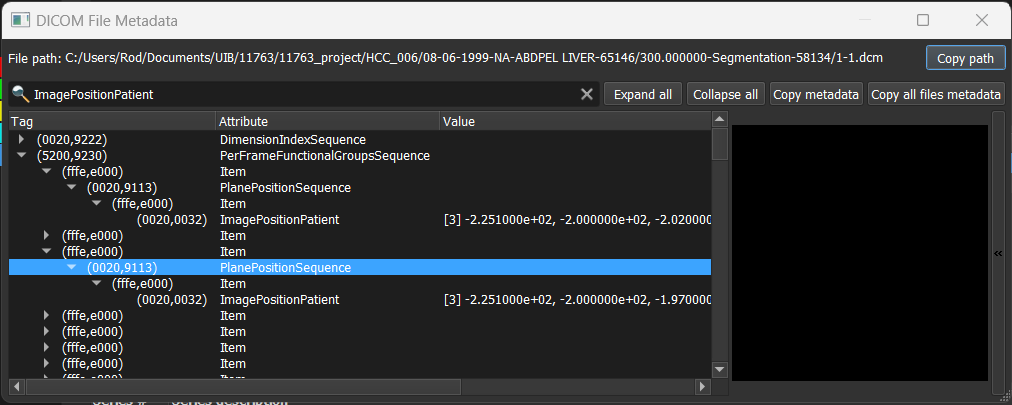

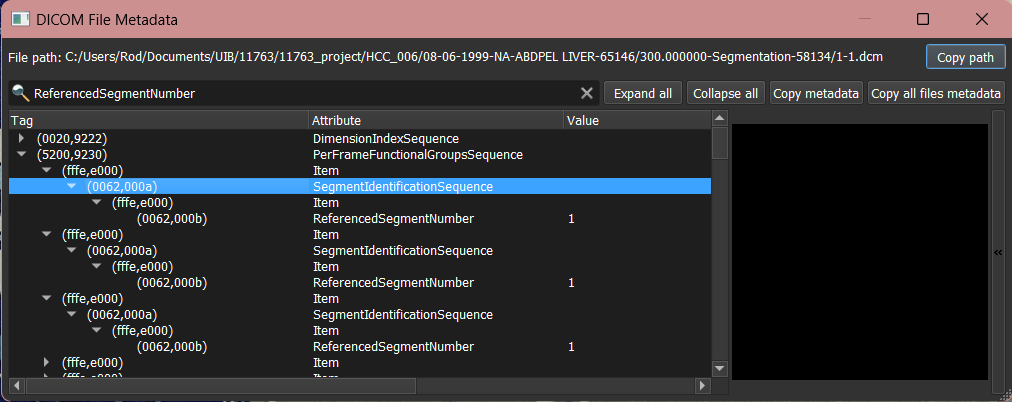

In [55]:
import pandas as pd
seg_df = pd.DataFrame()


# 'ImagePositionPatient'
# 'ReferencedSegmentNumber'
IPP_list = []
RSN_list = []
for item in seg.PerFrameFunctionalGroupsSequence:
#     print(type(item.PlanePositionSequence))
#     print(type(item.PlanePositionSequence[0].ImagePositionPatient))
    IPP = float(item.PlanePositionSequence[0].ImagePositionPatient[0])
    
#     print(type(item.SegmentIdentificationSequence[0]))
#     print(type(item.SegmentIdentificationSequence[0].ReferencedSegmentNumber))
    RSN = item.SegmentIdentificationSequence[0].ReferencedSegmentNumber
    
#     print(IPP, RSN)
    IPP_list.append(IPP)
    RSN_list.append(RSN)
print(len(IPP_list), len(RSN_list))

seg_df['IPP'] = IPP_list
seg_df['RSN'] = RSN_list

276 276


In [56]:
seg_df.head()

,IPP,RSN
0,-225.1,1
1,-225.1,1
2,-225.1,1
3,-225.1,1
4,-225.1,1


## Visualize CT Dicom Headers

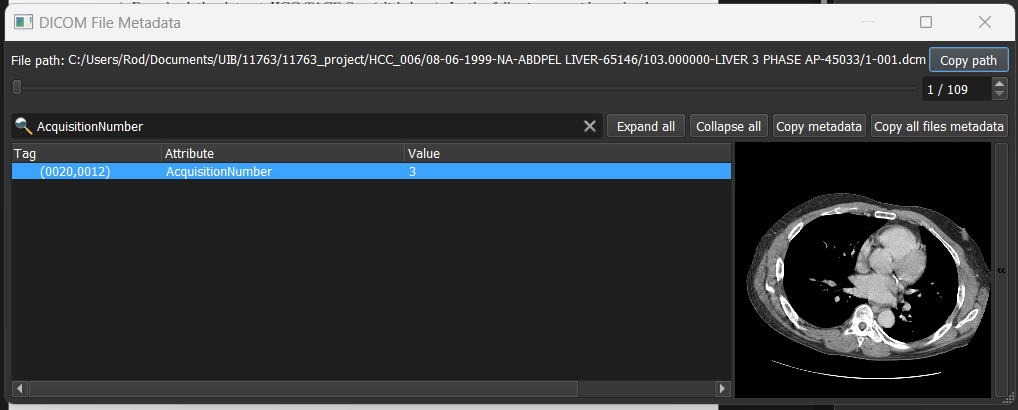

In [62]:
# 'AcquisitionNumber'
# 'Slice Index'
ct_df = pd.DataFrame()

# Acquisition Number
AN_list = []
# Instance Number
IN_list = []
# Iterate through each DICOM file
for file_path in dicom_files:
    # Read the DICOM file
    ct = pydicom.dcmread(file_path)
    
    AN = ct.AcquisitionNumber
    IN = ct.InstanceNumber
    
    AN_list.append(AN)
    IN_list.append(IN)
    
ct_df['AN'] = AN_list
ct_df['IN'] = IN_list

In [63]:
print(ct_df['AN'].unique())
print(len(ct_df['AN']))
print(ct_df.head())

[3]
109
   AN  IN
0   3   1
1   3   2
2   3   3
3   3   4
4   3   5


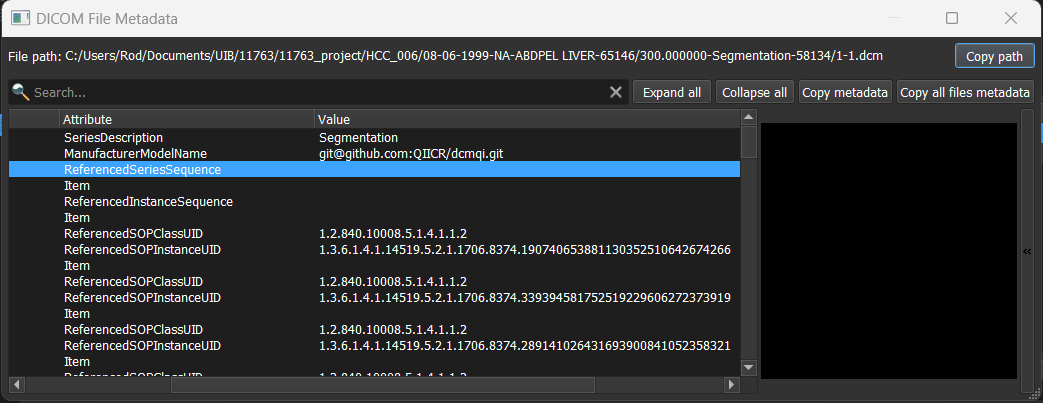
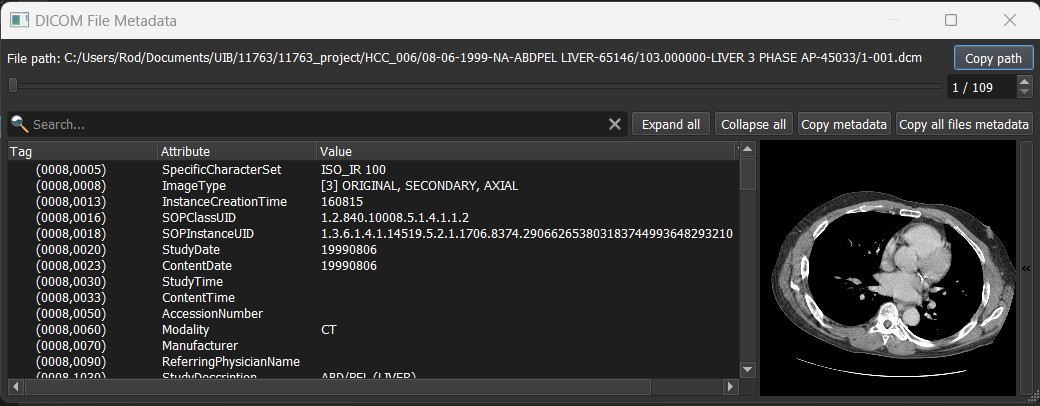
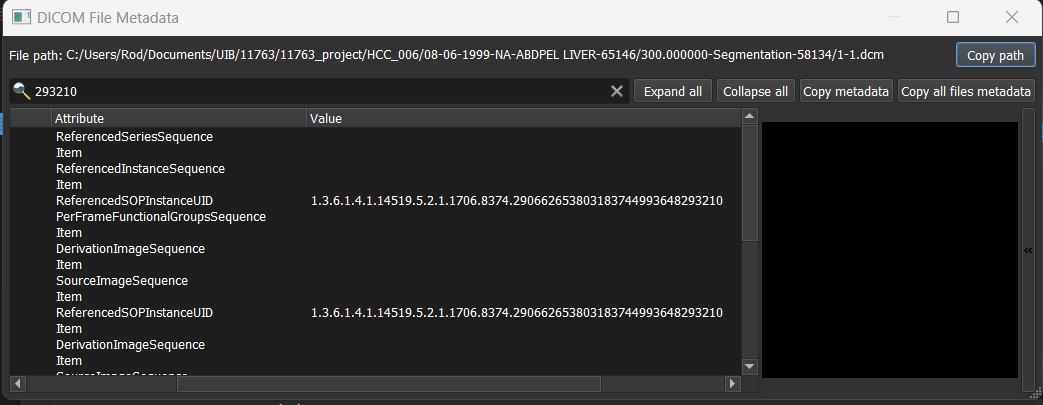
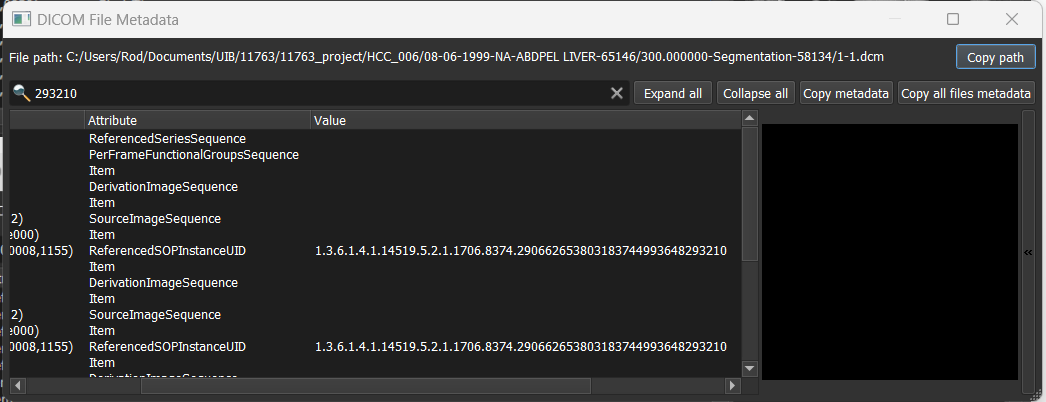
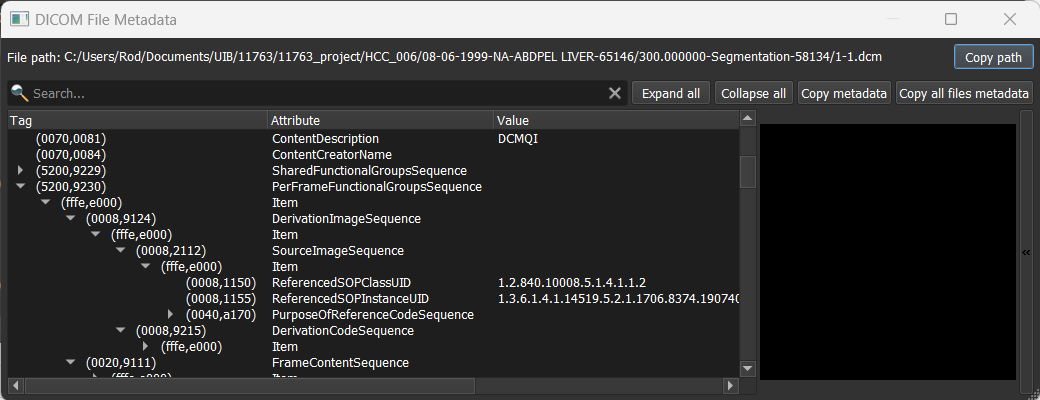

In [71]:
import pandas as pd
seg_df = pd.DataFrame()


# 'ImagePositionPatient'
IPP_list = []
# 'ReferencedSegmentNumber'
RSN_list = []
# ReferencedSOPClassUID
RSCU_list = []
# ReferencedSOPInstanceUID
RSIU_list = []
for item in seg.PerFrameFunctionalGroupsSequence:
    IPP = item.PlanePositionSequence[0].ImagePositionPatient
    RSN = item.SegmentIdentificationSequence[0].ReferencedSegmentNumber
    
    temp = item.DerivationImageSequence[0].SourceImageSequence[0]
    RSCU = temp.ReferencedSOPClassUID
    RSIU = temp.ReferencedSOPInstanceUID
#     print(IPP, RSN)
    IPP_list.append(IPP)
    RSN_list.append(RSN)
    RSCU_list.append(RSCU)
    RSIU_list.append(RSIU)

# for item in seg.ReferencedSeriesSequence:
#     item.

seg_df['IPP'] = IPP_list
seg_df['RSN'] = RSN_list
seg_df['RSCU'] = RSCU_list
seg_df['RSIU'] = RSIU_list

seg_parts_df = pd.DataFrame()

num_l = []
label_l = []
desc_l = []
for item in seg.SegmentSequence:
    num_l.append(item.SegmentNumber)
    label_l.append(item.SegmentLabel)
    desc_l.append(item.SegmentDescription)
    
seg_parts_df['SegNum'] = num_l
seg_parts_df['SegLabel'] = label_l
seg_parts_df['SegDesc'] = desc_l

In [69]:
seg_df.head()

,IPP,RSN,RSCU,RSIU
0,"[-2.251000e+02, -2.000000e+02, -2.020000e+02]",1,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.190740653881...
1,"[-2.251000e+02, -2.000000e+02, -1.995000e+02]",1,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.339394581752...
2,"[-2.251000e+02, -2.000000e+02, -1.970000e+02]",1,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.289141026431...
3,"[-2.251000e+02, -2.000000e+02, -1.945000e+02]",1,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.153713471910...
4,"[-2.251000e+02, -2.000000e+02, -1.920000e+02]",1,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.400894383744...


In [72]:
seg_parts_df.head()

,SegNum,SegLabel,SegDesc
0,1,Liver,Liver
1,2,Mass,Tumor
2,3,Portal vein,vessels
3,4,Abdominal aorta,aorta


In [85]:
# Merge the dataframes on RSN from seg_df and SegNum from seg_parts_df
merged_seg_df = seg_df.merge(seg_parts_df, left_on='RSN', right_on='SegNum', how='inner')

# Display the merged dataframe
merged_seg_df.head()

,IPP,RSN,RSCU,RSIU,SegNum,SegLabel,SegDesc
0,"[-2.251000e+02, -2.000000e+02, -2.020000e+02]",1,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.190740653881...,1,Liver,Liver
1,"[-2.251000e+02, -2.000000e+02, -1.995000e+02]",1,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.339394581752...,1,Liver,Liver
2,"[-2.251000e+02, -2.000000e+02, -1.970000e+02]",1,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.289141026431...,1,Liver,Liver
3,"[-2.251000e+02, -2.000000e+02, -1.945000e+02]",1,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.153713471910...,1,Liver,Liver
4,"[-2.251000e+02, -2.000000e+02, -1.920000e+02]",1,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.400894383744...,1,Liver,Liver


In [81]:
len(merged_df)

276

In [107]:
# 'AcquisitionNumber'
# 'Slice Index'
ct_df = pd.DataFrame()

AN_list = [] #AcquisitionNumber
IN_list = [] # InstanceNumber
SCU_list = [] # SOPClassUID
SIU_list = [] # SOPInstanceUID
pixel_array_list = [] pixel_array
# Iterate through each DICOM file
for file_path in dicom_files:
    # Read the DICOM file
    ct = pydicom.dcmread(file_path)
    
    AN_list.append(ct.AcquisitionNumber)
    IN_list.append(ct.InstanceNumber)
    SCU_list.append(ct.SOPClassUID)
    SIU_list.append(ct.SOPInstanceUID)
    pixel_array_list.append(ct.pixel_array)

    
ct_df['AN'] = AN_list
ct_df['IN'] = IN_list
ct_df['SCU'] = SCU_list
ct_df['SIU'] = SIU_list
ct_df['pixel_arrays'] = pixel_array_list

In [108]:
ct_df.head()

,AN,IN,SCU,SIU,pixel_arrays
0,3,1,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.290662653803...,"[[-1024, -1024, -1024, -1024, -1024, -1024, -1..."
1,3,2,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.320863378903...,"[[-1024, -1024, -1024, -1024, -1024, -1024, -1..."
2,3,3,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.279015054499...,"[[-1024, -1024, -1024, -1024, -1024, -1024, -1..."
3,3,4,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.233292604036...,"[[-1024, -1024, -1024, -1024, -1024, -1024, -1..."
4,3,5,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.290240904485...,"[[-1024, -1024, -1024, -1024, -1024, -1024, -1..."


In [109]:
merged_ct_seg_df = ct_df.merge(merged_seg_df, left_on='SIU', right_on='RSIU', how='inner')

# Display the merged dataframe
merged_ct_seg_df.head()

,AN,IN,SCU,SIU,pixel_arrays,IPP,RSN,RSCU,RSIU,SegNum,SegLabel,SegDesc
0,3,1,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.290662653803...,"[[-1024, -1024, -1024, -1024, -1024, -1024, -1...","[-2.251000e+02, -2.000000e+02, -3.200000e+01]",1,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.290662653803...,1,Liver,Liver
1,3,1,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.290662653803...,"[[-1024, -1024, -1024, -1024, -1024, -1024, -1...","[-2.251000e+02, -2.000000e+02, -3.200000e+01]",2,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.290662653803...,2,Mass,Tumor
2,3,1,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.290662653803...,"[[-1024, -1024, -1024, -1024, -1024, -1024, -1...","[-2.251000e+02, -2.000000e+02, -3.200000e+01]",3,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.290662653803...,3,Portal vein,vessels
3,3,1,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.290662653803...,"[[-1024, -1024, -1024, -1024, -1024, -1024, -1...","[-2.251000e+02, -2.000000e+02, -3.200000e+01]",4,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.290662653803...,4,Abdominal aorta,aorta
4,3,2,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.320863378903...,"[[-1024, -1024, -1024, -1024, -1024, -1024, -1...","[-2.251000e+02, -2.000000e+02, -3.450000e+01]",1,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.320863378903...,1,Liver,Liver


In [368]:
merged_ct_seg_df[['AN', 'IN', 'SIU', 'IPP', 'RSN', 'RSIU', 'SegNum', 'SegDesc']].head()


,AN,IN,SIU,IPP,RSN,RSIU,SegNum,SegDesc
0,3,1,1.3.6.1.4.1.14519.5.2.1.1706.8374.290662653803...,"[-2.251000e+02, -2.000000e+02, -3.200000e+01]",1,1.3.6.1.4.1.14519.5.2.1.1706.8374.290662653803...,1,Liver
1,3,1,1.3.6.1.4.1.14519.5.2.1.1706.8374.290662653803...,"[-2.251000e+02, -2.000000e+02, -3.200000e+01]",2,1.3.6.1.4.1.14519.5.2.1.1706.8374.290662653803...,2,Tumor
2,3,1,1.3.6.1.4.1.14519.5.2.1.1706.8374.290662653803...,"[-2.251000e+02, -2.000000e+02, -3.200000e+01]",3,1.3.6.1.4.1.14519.5.2.1.1706.8374.290662653803...,3,vessels
3,3,1,1.3.6.1.4.1.14519.5.2.1.1706.8374.290662653803...,"[-2.251000e+02, -2.000000e+02, -3.200000e+01]",4,1.3.6.1.4.1.14519.5.2.1.1706.8374.290662653803...,4,aorta
4,3,2,1.3.6.1.4.1.14519.5.2.1.1706.8374.320863378903...,"[-2.251000e+02, -2.000000e+02, -3.450000e+01]",1,1.3.6.1.4.1.14519.5.2.1.1706.8374.320863378903...,1,Liver


In [110]:
len(merged_ct_seg_df)

276

In [111]:
# Check if values in column 'A' and column 'B' are the same
are_equal = merged_ct_seg_df['SIU'] == merged_ct_seg_df['RSIU']
print(are_equal.unique())

[ True]


In [112]:
len(merged_ct_seg_df['SIU'].unique())

69

In [113]:
len(merged_ct_seg_df['RSIU'].unique())

69

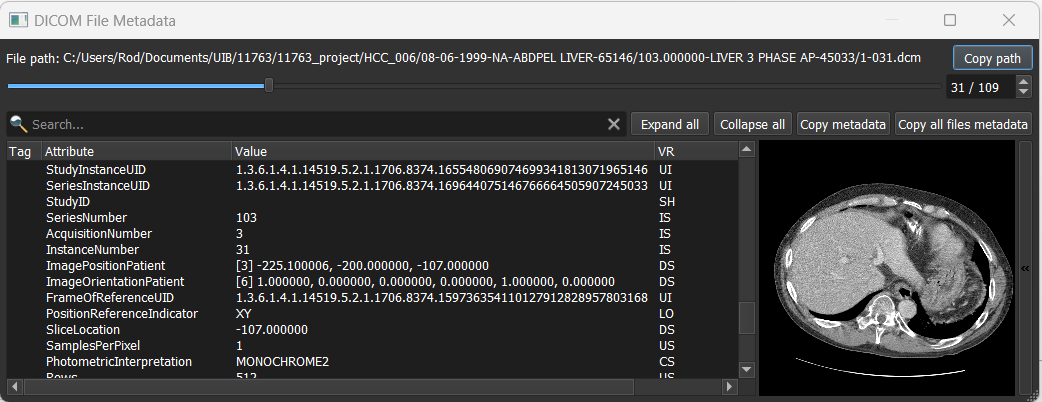

In [120]:
# Sort the DataFrame based on the third items of the lists in the 'IPP' column
sorted_df = merged_ct_seg_df.iloc[merged_ct_seg_df['IPP'].apply(lambda x: x[2]).argsort()]

# Display the sorted DataFrame
sorted_df.head()

,AN,IN,SCU,SIU,pixel_arrays,IPP,RSN,RSCU,RSIU,SegNum,SegLabel,SegDesc
275,3,69,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.190740653881...,"[[-1024, -1024, -1024, -1024, -1024, -1024, -1...","[-2.251000e+02, -2.000000e+02, -2.020000e+02]",4,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.190740653881...,4,Abdominal aorta,aorta
272,3,69,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.190740653881...,"[[-1024, -1024, -1024, -1024, -1024, -1024, -1...","[-2.251000e+02, -2.000000e+02, -2.020000e+02]",1,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.190740653881...,1,Liver,Liver
274,3,69,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.190740653881...,"[[-1024, -1024, -1024, -1024, -1024, -1024, -1...","[-2.251000e+02, -2.000000e+02, -2.020000e+02]",3,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.190740653881...,3,Portal vein,vessels
273,3,69,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.190740653881...,"[[-1024, -1024, -1024, -1024, -1024, -1024, -1...","[-2.251000e+02, -2.000000e+02, -2.020000e+02]",2,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.190740653881...,2,Mass,Tumor
271,3,68,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.339394581752...,"[[-1024, -1024, -1024, -1024, -1024, -1024, -1...","[-2.251000e+02, -2.000000e+02, -1.995000e+02]",4,1.2.840.10008.5.1.4.1.1.2,1.3.6.1.4.1.14519.5.2.1.1706.8374.339394581752...,4,Abdominal aorta,aorta


In [160]:
temp = sorted_df['pixel_arrays'].values
# Combine the pixel arrays into a 3D NumPy image
stacked_image = np.stack(temp, axis=0)

In [136]:
stacked_image.shape

(276, 512, 512)

In [131]:
def display_slices(x_slice, y_slice, z_slice):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(stacked_image[x_slice, :, :], cmap='bone')
    axes[0].set_title(f'X Slice: {x_slice}')
    axes[1].imshow(stacked_image[:, y_slice, :], cmap='bone')#, aspect=pixel_dim_mm[0] / pixel_dim_mm[2])
    axes[1].set_title(f'Y Slice: {y_slice}')
    axes[2].imshow(stacked_image[:, :, z_slice], cmap='bone')#, aspect=pixel_dim_mm[0] / pixel_dim_mm[1])
    axes[2].set_title(f'Z Slice: {z_slice}')

    plt.show()

x_slider = IntSlider(min=0, max=stacked_image.shape[0]-1, step=1, value=33, description='X Slice:')
y_slider = IntSlider(min=0, max=stacked_image.shape[1]-1, step=1, value=250, description='Y Slice:')
z_slider = IntSlider(min=0, max=stacked_image.shape[2]-1, step=1, value=181, description='Z Slice:')

interact(display_slices, x_slice=x_slider, y_slice=y_slider, z_slice=z_slider)

interactive(children=(IntSlider(value=33, description='X Slice:', max=108), IntSlider(value=250, description='…

<function __main__.display_slices(x_slice, y_slice, z_slice)>

In [167]:
unique_arrays = [arr.tostring() for arr in merged_ct_seg_df['pixel_arrays']]
unique_values = pd.Series(unique_arrays).unique()

len(unique_values)

C:\Users\Rod\AppData\Local\Temp\ipykernel_2792\601824256.py:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  unique_arrays = [arr.tostring() for arr in merged_ct_seg_df['pixel_arrays']]


69

In [383]:
# Get unique values of 'SIU'
unique_SIU_values = merged_ct_seg_df['SIU'].unique()

# Initialize a list to store merged arrays
merged_arrays = []

# Iterate over unique SIU values
for SIU_value in unique_SIU_values:
    # Extract arrays corresponding to the current SIU value
    arrays = merged_ct_seg_df.loc[merged_ct_seg_df['SIU'] == SIU_value, 'pixel_arrays'].values
    
    # Check if all arrays are identical
    if all(np.array_equal(arrays[0], arr) for arr in arrays[1:]):
        # If arrays are identical, append only the first array
        merged_array = arrays[0]
    else:
        # If arrays are not identical, stack all arrays
        merged_array = np.stack(arrays, axis=0)
    
    # Append the merged array to the list
    merged_arrays.append(merged_array)

# Concatenate merged arrays along a new axis
merged_ct_result = np.stack(merged_arrays, axis=0)

In [385]:
merged_ct_result.shape

(69, 512, 512)

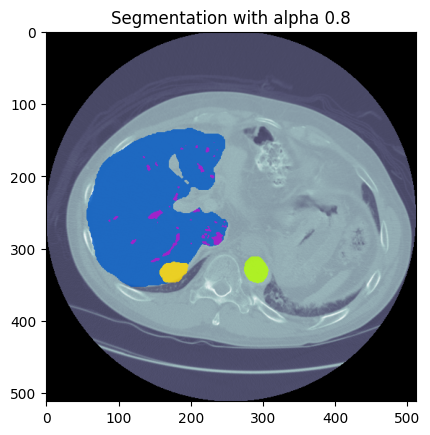

In [382]:
idx=33
combined_seg_parts = seg_pixel_array[idx,:,:]*0.25 \
            + seg_pixel_array[idx+69,:,:]*0.5 \
            + seg_pixel_array[idx+2*69,:,:]*0.75 \
            + seg_pixel_array[idx+3*69,:,:]*0.99

def visualize_alpha_fusion(img: np.ndarray, mask: np.ndarray, alpha: float = 0.8, show=True):
    """ Visualize both image and mask in the same plot. """
    # Normalize the image
    img_normalized = Normalize()(img)

    # Apply colormap to the normalized image
    img_cmapped = apply_cmap(img_normalized, cmap_name='bone')

    # Apply colormap to the mask
    mask_bone_cmapped = apply_cmap(mask, cmap_name='prism')

    # Ensure mask is boolean
    mask_bone_cmapped = mask_bone_cmapped * mask[..., np.newaxis].astype('bool')

    # Find non-zero values in the mask
    non_zero_indices = np.nonzero(mask)

    # Perform alpha blending only for non-zero regions
    out = np.copy(img_cmapped)
    out[non_zero_indices] = img_cmapped[non_zero_indices] * (1 - alpha) + mask_bone_cmapped[non_zero_indices] * alpha

    if show:
        # Display the blended image
        plt.imshow(out)
        plt.title(f'Segmentation with alpha {alpha}')
        plt.show()
#     print('HIHI!')

    return out


out = visualize_alpha_fusion(merged_ct_result[idx], combined_seg_parts)

In [348]:
out.shape

(512, 512, 4)

In [369]:
combined_seg_parts.shape

(512, 512)

In [286]:
merged_ct_result[idx].shape

(512, 512)

In [361]:
import numpy as np

# Define weights for each region
weights = [0.25, 0.5, 0.75, 0.99]

# Initialize an array to store the combined regions
combined_regions = np.zeros((69, 512, 512), dtype=float)

# Iterate over the frames
for frame_idx in range(69):
    # Initialize an empty array to store the combined regions for the current frame
    combined_frame = np.zeros((512, 512), dtype=float)
    
    # Iterate over the regions and their corresponding weights
    for i, weight in enumerate(weights):
        # Calculate the index of the current region
        region_idx = frame_idx + i * 69
        
        # Add the weighted region to the combined array for the current frame
        combined_frame += seg_pixel_array[region_idx] * weight
    
    # Assign the combined frame to the corresponding frame in the combined_regions array
    combined_regions[frame_idx] = combined_frame

In [362]:
combined_regions.shape

(69, 512, 512)

In [ ]:
temp1 = np.flip(merged_ct_result, axis=0)  # Change orientation (better visualization)
temp2 = np.flip(merged_ct_result, axis=0)  # Change orientation (better visualization)

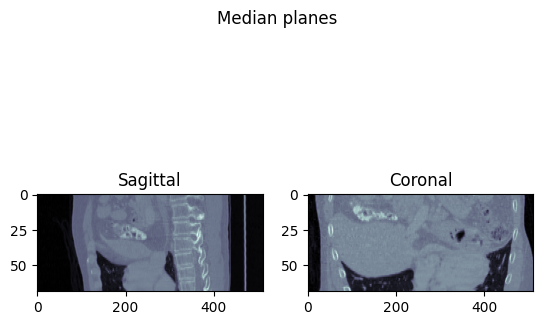

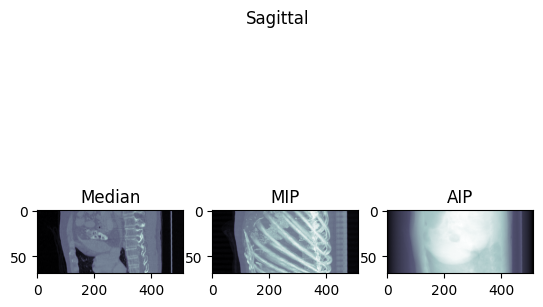

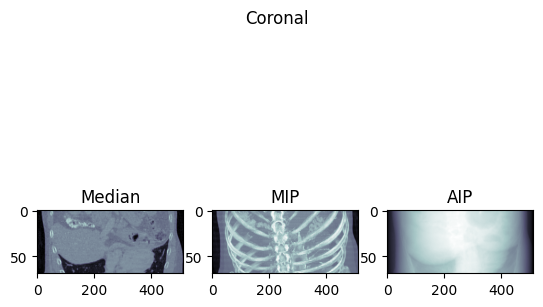

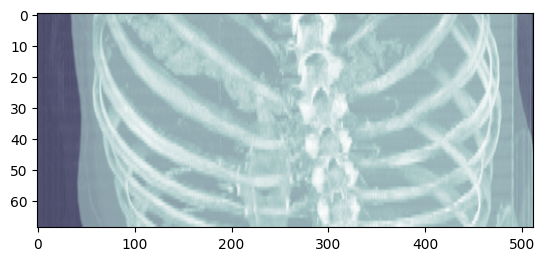

In [345]:
pixel_len_mm = pixel_dim_mm  # Pixel length in mm [z, y, x]

# img_dcm = merged_ct_result[idx].copy()

# img_dcm = dcm.pixel_array           # Get pixel array
img_dcm = np.flip(merged_ct_result, axis=0)  # Change orientation (better visualization)
# img_dcm = np.flip(visualized_volume, axis=0)

# Show median planes
fig, ax = plt.subplots(1, 2)
ax[0].imshow(median_sagittal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[0].set_title('Sagittal')
ax[1].imshow(median_coronal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[2])
ax[1].set_title('Coronal')
fig.suptitle('Median planes')
plt.show()

# Show MIP/AIP/Median planes
fig, ax = plt.subplots(1, 3)
ax[0].imshow(median_sagittal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[0].set_title('Median')
ax[1].imshow(MIP_sagittal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[1].set_title('MIP')
ax[2].imshow(AIP_sagittal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[2].set_title('AIP')
fig.suptitle('Sagittal')
plt.show()
fig, ax = plt.subplots(1, 3)
ax[0].imshow(median_coronal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[0].set_title('Median')
ax[1].imshow(MIP_coronal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[1].set_title('MIP')
ax[2].imshow(AIP_coronal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[2].set_title('AIP')
fig.suptitle('Coronal')
plt.show()

# Create projections varying the angle of rotation
#   Configure visualization colormap
img_min = np.amin(img_dcm)
img_max = np.amax(img_dcm)
cm = matplotlib.colormaps['bone']
fig, ax = plt.subplots()
#   Configure directory to save results
os.makedirs('results/MIP/', exist_ok=True)
#   Create projections
n = 6
projections = []
for idx, alpha in enumerate(np.linspace(0, 360*(n-1)/n, num=n)):
    rotated_img = rotate_on_axial_plane(img_dcm, alpha)
    projection = MIP_sagittal_plane(rotated_img)
    plt.imshow(projection, cmap=cm, vmin=img_min, vmax=img_max, aspect=pixel_len_mm[0] / pixel_len_mm[1])
    plt.savefig(f'results/MIP/Projection_{idx}.png')      # Save animation
    projections.append(projection)  # Save for later animation
# Save and visualize animation
animation_data = [
    [plt.imshow(img, animated=True, cmap=cm, vmin=img_min, vmax=img_max, aspect=pixel_len_mm[0] / pixel_len_mm[1])]
    for img in projections
]
anim = animation.ArtistAnimation(fig, animation_data,
                          interval=250, blit=True)
anim.save('results/MIP/Animation.gif')  # Save animation
plt.show()                              # Show animation

In [378]:
# Normalize combined_regions to the range 0-1
combined_regions_normalized = (combined_regions - np.min(combined_regions)) / (np.max(combined_regions) - np.min(combined_regions))


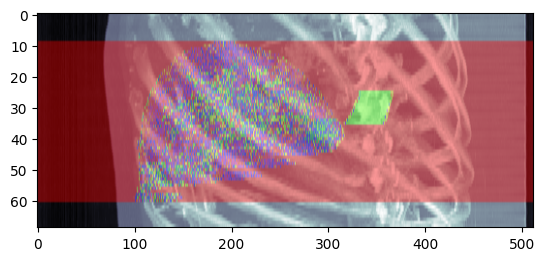

In [392]:
pixel_len_mm = pixel_dim_mm  # Pixel length in mm [z, y, x]

# img_dcm = merged_ct_result[idx].copy()

# img_dcm = dcm.pixel_array           # Get pixel array
img_dcm = np.flip(merged_ct_result, axis=0)  # Change orientation (better visualization)
img_dcm_seg = np.flip(combined_regions_normalized, axis=0)  # Change orientation (better visualization)
# img_dcm = np.flip(visualized_volume, axis=0)

# Create projections varying the angle of rotation
#   Configure visualization colormap
img_min = np.amin(img_dcm)
img_max = np.amax(img_dcm)
cm = matplotlib.colormaps['bone']
fig, ax = plt.subplots()
#   Configure directory to save results
os.makedirs('results/MIP/', exist_ok=True)
#   Create projections
n = 16
projections = []
# alpha = 0.4
for idx, alpha in enumerate(np.linspace(0, 360*(n-1)/n, num=n)):
    rotated_ct = rotate_on_axial_plane(img_dcm, alpha)
    projection_ct = MIP_sagittal_plane(rotated_ct)

    rotated_seg = rotate_on_axial_plane(img_dcm_seg, alpha)
    projection_seg = MIP_sagittal_plane(rotated_seg)
    
    vis_alpha = visualize_alpha_fusion(projection_ct, projection_seg, 0.4, show=False)
    plt.imshow(vis_alpha, cmap=cm, vmin=img_min, vmax=img_max, aspect=pixel_len_mm[0] / pixel_len_mm[2])
    plt.savefig(f'results/MIP/Projection_{idx}.png')      # Save animation
    projections.append(vis_alpha)  # Save for later animation
# Save and visualize animation
animation_data = [
    [plt.imshow(img, animated=True, cmap=cm, vmin=img_min, vmax=img_max, aspect=pixel_len_mm[0] / pixel_len_mm[2])]
    for img in projections
]
anim = animation.ArtistAnimation(fig, animation_data,
                          interval=250, blit=True)
anim.save('results/MIP/Animation_seg_sagittal.gif')  # Save animation
plt.show()                              # Show animation